# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [58]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
browser = Browser('chrome')

The chromedriver version (121.0.6167.85) detected in PATH at C:\Users\bosb0\Documents\chromedriver-win64\chromedriver.exe might not be compatible with the detected chrome version (122.0.6261.57); currently, chromedriver 122.0.6261.57 is recommended for chrome 122.*, so it is advised to delete the driver in PATH and retry


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [60]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [61]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [80]:
# Extract all rows of data
table_all = soup.find('table', class_='table')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [63]:
# Extract table rows excluding the header row
table_rows = soup.find_all('tr')[1:]

# Initialize an empty list to store dictionaries
data = []

# Extract data from each row and create dictionaries
for row in table_rows:
    columns = row.find_all('td')
    data.append({
        'id': int(columns[0].text),
        'terrestrial_date': columns[1].text,
        'sol': int(columns[2].text),
        'ls': int(columns[3].text),
        'month': int(columns[4].text),
        'min_temp': float(columns[5].text),
        'pressure': float(columns[6].text)
    })
temp_df = pd.DataFrame(data)


In [64]:
# Create an empty list
mars_temp = []
# Loop through the scraped data to create a list of rows
rows = table_all.find_all('tr')[1:]
for row in rows:
    columns = row.find_all('td')
    mars_temp.append({
        'id': columns[0].text,
        'terrestrial_date': columns[1].text,
        'sol': columns[2].text,
        'ls': columns[3].text,
        'month': columns[4].text,
        'min temp': columns[5].text,
        'pressure': columns[6].text
        })


In [65]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_df = pd.DataFrame(mars_temp)

In [66]:
# Confirm DataFrame was created successfully
mars_temp_df

,id,terrestrial_date,sol,ls,month,min temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [67]:
# Examine data type of each column
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min temp            object
pressure            object
dtype: object

In [68]:
# Change data types for data analysis
mars_temp_df['terrestrial_date'] = mars_temp_df['terrestrial_date'].astype('datetime64[ns]')
mars_temp_df['sol'] = mars_temp_df['sol'].astype('int')
mars_temp_df['ls'] = mars_temp_df['ls'].astype('int')
mars_temp_df['month'] = mars_temp_df['month'].astype('int')
mars_temp_df['min temp'] = mars_temp_df['min temp'].astype('float')
mars_temp_df['pressure'] = mars_temp_df['pressure'].astype('float')

In [69]:
# Confirm type changes were successful by examining data types again
mars_temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [70]:
# 1. How many months are there on Mars?
mars_temp_df.value_counts('month')

month
4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: count, dtype: int64

## Question 1:
There are 12 months outlined in the data, each with varying numbers of data points 

In [71]:
# 2. How many Martian days' worth of data are there?
mars_temp_df['id'].count()

1867

## Question 2:
There are 1867 lines of data in the table, so 1867 days assuming that each data point represents a different day

## Question 3-5:
Please refer to the following outputs and graphs for average temperatures and pressures. The graphs will also cover peaks in the years to allow for approximate days in the year to be perceived. Analysis conducted after

In [72]:
# 3. What is the average low temperature by month?
min_avg = mars_temp_df.groupby('month')['min temp'].mean()
min_avg

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min temp, dtype: float64

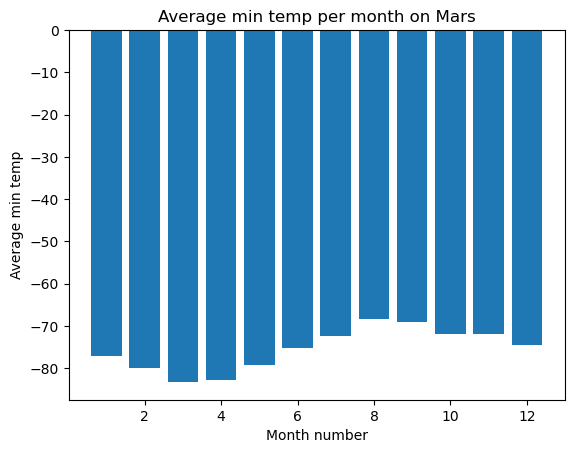

In [73]:
# Plot the average temperature by month
min_avg_df = pd.DataFrame(min_avg)

plt.bar(min_avg_df.index, min_avg_df['min temp'])
plt.show
plt.xlabel("Month number")
plt.ylabel("Average min temp")
plt.title("Average min temp per month on Mars")
plt.savefig('./Output/Graphs/mars_average_monthly_min_temp.png')
plt.show()

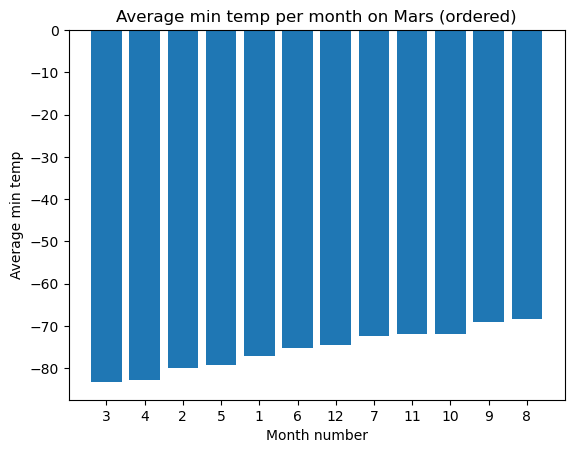

In [76]:
# Identify the coldest and hottest months in Curiosity's location
#min_avg_df.reset_index(inplace=True)
sorted_min_avg_df = min_avg_df.sort_values(by='min temp', ascending=True)

        #----------- Assisted with AI
sorted_min_avg_df.reset_index(inplace=True)
# Plot the data as a bar chart
plt.bar(range(len(sorted_min_avg_df)), sorted_min_avg_df['min temp'])

# Set the x-axis labels to the 'month' values
plt.xticks(range(len(sorted_min_avg_df)), sorted_min_avg_df['month'])
        #-----------
plt.xlabel("Month number")
plt.ylabel("Average min temp")
plt.title("Average min temp per month on Mars (ordered)")
plt.savefig('./Output/Graphs/mars_average_monthly_min_temp_ordered.png')
plt.show()

In [77]:
# 4. Average pressure by Martian month
pressure = mars_temp_df.groupby('month')['pressure'].mean()
pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

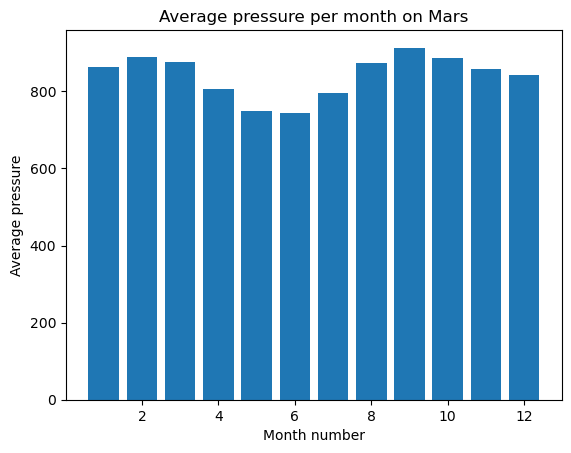

In [78]:
# Plot the average pressure by month
pressure_df = pd.DataFrame(pressure)

plt.bar(pressure_df.index, pressure_df['pressure'])
plt.xlabel("Month number")
plt.ylabel("Average pressure")
plt.title("Average pressure per month on Mars")
plt.savefig('./Output/Graphs/mars_average_monthly_pressure.png')
plt.show()


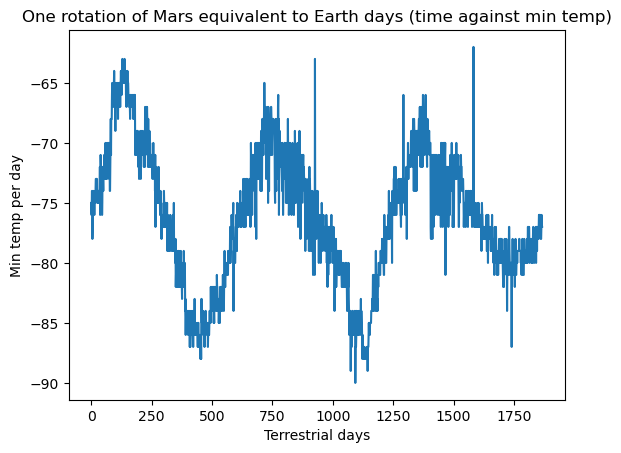

In [79]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(mars_temp_df.index, mars_temp_df['min temp'])
plt.xlabel("Terrestrial days")
plt.ylabel("Min temp per day")
plt.title("One rotation of Mars equivalent to Earth days (time against min temp)")
plt.savefig('./Output/Graphs/earth_days_per_mars_year.png')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
mars_temp_df.to_csv('./Output/mars_temp_overview.csv', index=False)

In [ ]:
browser.quit()